In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cmcrameri.cm as cmc
import cartopy.crs as ccrs
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data_type = "sea_level_anomaly"
# data_type = "sea_level_anomaly_filtered"
data_type = "sea_level_anomaly_raw"

In [3]:
file_old = Path("data/data_Cryotempo_phase1_noveltis_tides_v2/combined_Cryotempo_phase1_noveltis_tides_v2/combined_2019_11.nc")
file_new = Path("data/data_Cryotempo_phase21_official/combined_Cryotempo_phase21_official/combined_2019_11.nc")

data_old = xr.open_dataset(file_old)
data_new = xr.open_dataset(file_new)

In [4]:
_, idx_same_lon, _ = np.intersect1d(data_old.longitude.values, data_new.longitude.values, return_indices=True)
_, idx_same_lat, _ = np.intersect1d(data_old.latitude.values, data_new.latitude.values, return_indices=True)

In [5]:
idx_same = np.intersect1d(idx_same_lon, idx_same_lat)

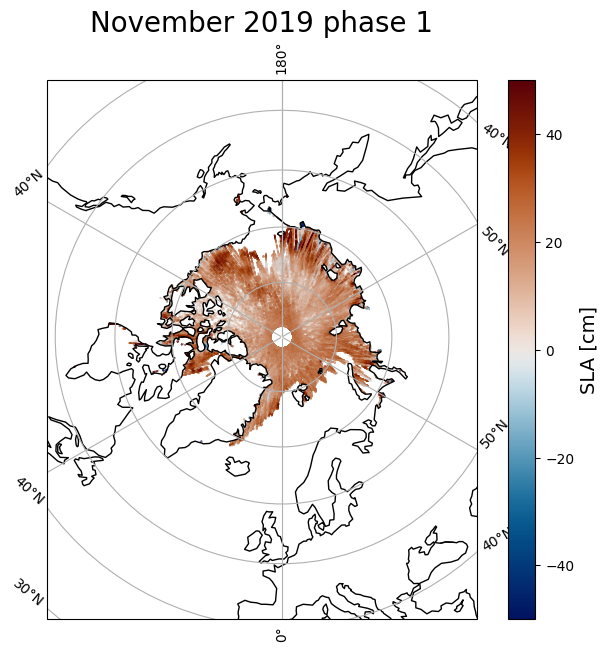

In [7]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(data_old.longitude, data_old.latitude, c=data_old[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"November 2019 phase 1", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

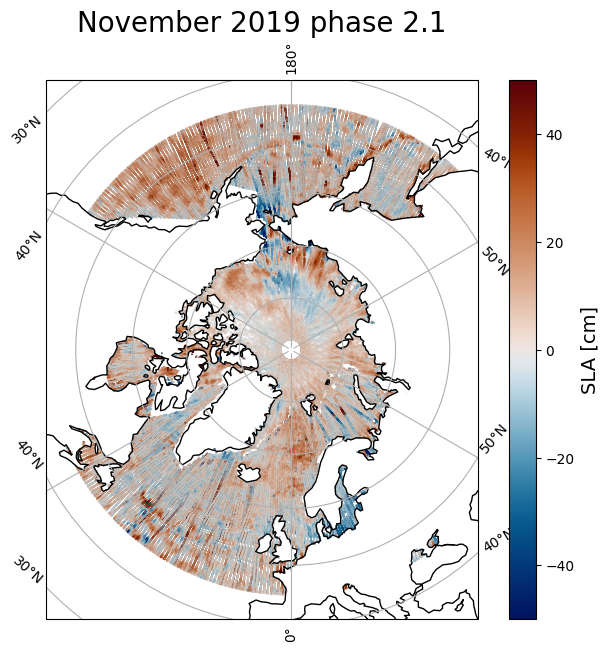

In [8]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(data_new.longitude, data_new.latitude, c=data_new[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"November 2019 phase 2.1", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [9]:
lat_both = xr.concat([data_old.latitude, data_new.latitude], dim="time")
lon_both = xr.concat([data_old.longitude, data_new.longitude], dim="time")
sla_both = xr.concat([data_old[data_type], data_new[data_type]], dim="time")

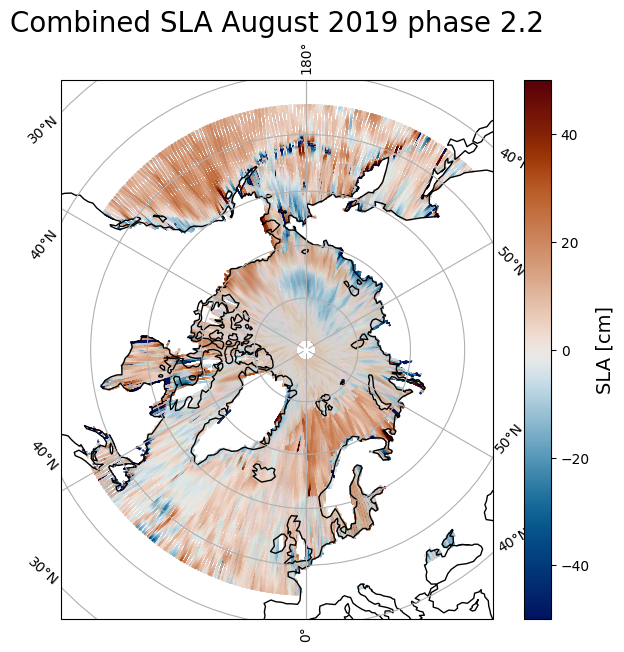

In [121]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 phase 2.2", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [14]:
idx_high = abs(data_old[data_type]) > 1
lat_high = data_old.latitude[idx_high]
lon_high = data_old.longitude[idx_high]
sla_high = data_old[data_type][idx_high]

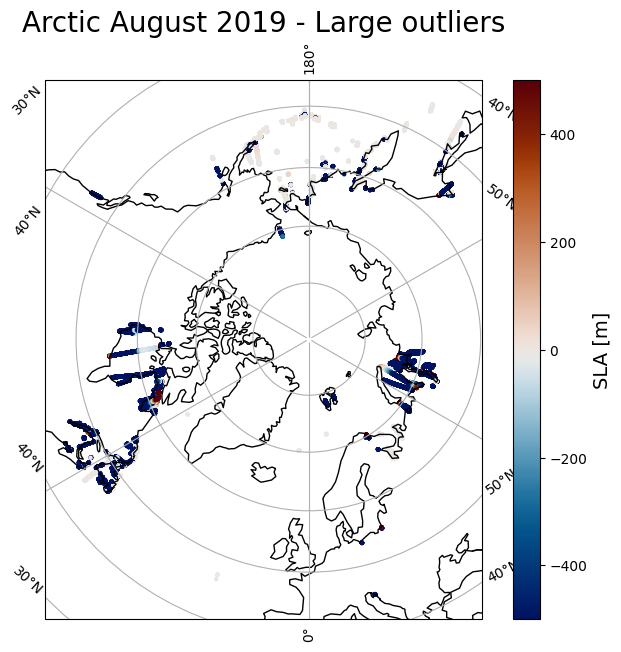

In [22]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(lon_high, lat_high, c=sla_high, s=5, alpha=1, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-500, vmax=500)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [m]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Arctic August 2019 - Large outliers", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [5]:
mean_old = data_old[data_type].mean()
mean_new = data_new[data_type].mean()
median_old = data_old[data_type].median()
median_new = data_new[data_type].median()
offset_median = median_new-median_old
offset_mean = mean_new-mean_old
new_sla_corr = data_new[data_type] - offset_median

sla_both_corr = xr.concat([data_old[data_type], new_sla_corr], dim="time")

In [123]:
print(offset_median.item())
print(offset_mean.item())

-0.027863223619775335
56.691895440905576


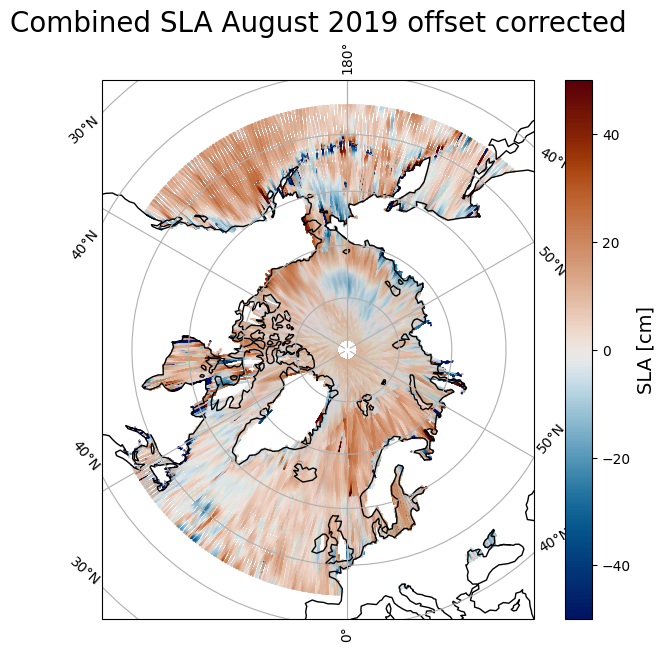

In [124]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both_corr*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 offset corrected", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [125]:
filter_idx = abs(new_sla_corr) < .75
lat_filtered = xr.concat([data_old.latitude, data_new.latitude[filter_idx]], dim="time")
lon_filtered = xr.concat([data_old.longitude, data_new.longitude[filter_idx]], dim="time")

new_sla_filtered = new_sla_corr[filter_idx]
sla_both_filtered = xr.concat([data_old[data_type], new_sla_filtered], dim="time")

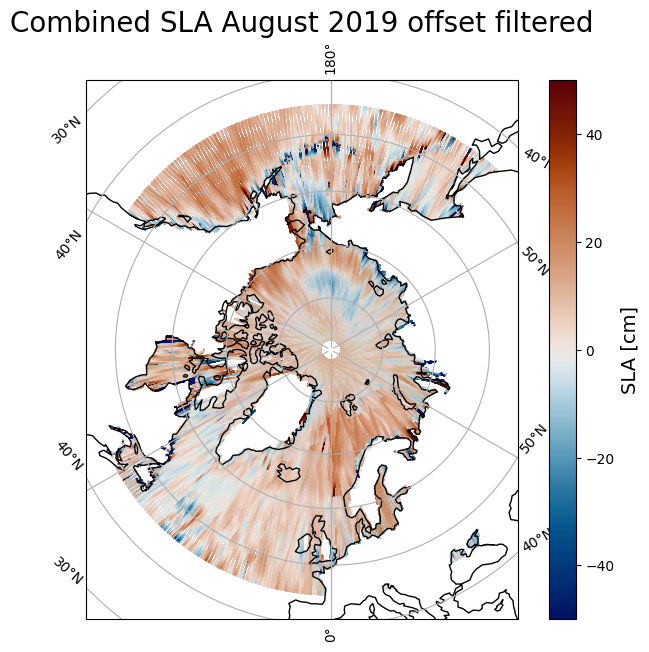

In [126]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(lon_filtered, lat_filtered, c=sla_both_filtered*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 offset filtered", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [127]:
border_sla_old_temp, border_lat_old_temp, border_lon_old_temp  = [], [], []
lon_old=data_old.longitude.values
lat_old=data_old.latitude.values
sla_old = data_old[data_type]
for i in tqdm(range(1,len(data_old[data_type]))):
    loni=lon_old[i]
    lonim=lon_old[i-1]
    lati=lat_old[i]
    latim=lat_old[i-1]
    if (loni-lonim > 0.1) | (lati-latim > 0.1):
        border_sla_old_temp.append(sla_old[i])
        border_sla_old_temp.append(sla_old[i-1])
        border_lat_old_temp.append(lati)
        border_lon_old_temp.append(loni)
        border_lat_old_temp.append(latim)
        border_lon_old_temp.append(lonim)

  0%|          | 0/8468416 [00:00<?, ?it/s]

100%|██████████| 8468416/8468416 [00:09<00:00, 929024.59it/s] 


In [128]:
border_lat_old, border_lon_old, border_sla_old = [], [], []
for i in range(len(border_sla_old_temp)):
    if border_lat_old_temp[i] > -66:
        border_lat_old.append(border_lat_old_temp[i])
        border_lon_old.append(border_lon_old_temp[i])
        border_sla_old.append(border_sla_old_temp[i])

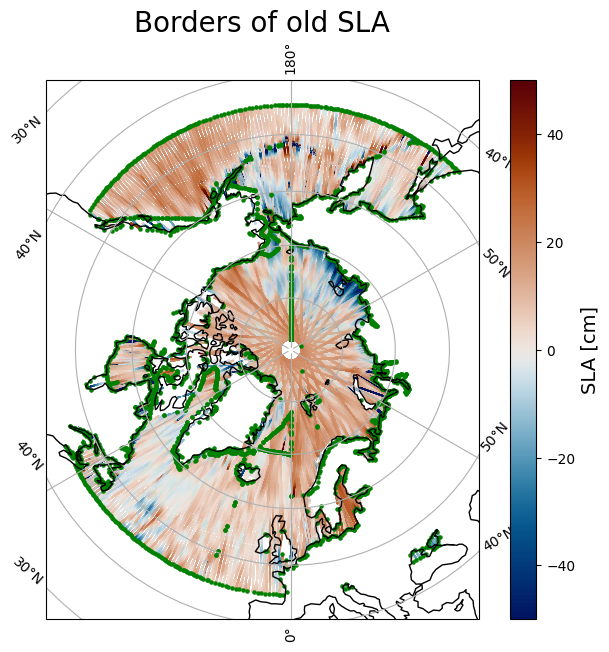

In [129]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(data_old.longitude, data_old.latitude, c=data_old[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.scatter(border_lon_old, border_lat_old, c="g", s=5, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Borders of old SLA", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [130]:
border_sla_new_temp, border_lat_new_temp, border_lon_new_temp  = [], [], []
lon_new=data_new.longitude.values
lat_new=data_new.latitude.values
sla_new = data_new[data_type]
for i in tqdm(range(1,len(data_new[data_type]))):
    loni=lon_new[i]
    lonim=lon_new[i-1]
    lati=lat_new[i]
    latim=lat_new[i-1]
    if (loni-lonim > 0.1) | (lati-latim > 0.1):
        border_sla_new_temp.append(sla_new[i])
        border_sla_new_temp.append(sla_new[i-1])
        border_lat_new_temp.append(lati)
        border_lon_new_temp.append(loni)
        border_lat_new_temp.append(latim)
        border_lon_new_temp.append(lonim)

100%|██████████| 6434886/6434886 [00:06<00:00, 1022875.15it/s]


In [131]:
border_lat_new, border_lon_new, border_sla_new = [], [], []
for i in range(len(border_sla_new_temp)):
    if border_lat_new_temp[i] < -50.1:
        border_lat_new.append(border_lat_new_temp[i])
        border_lon_new.append(border_lon_new_temp[i])
        border_sla_new.append(border_sla_new_temp[i])

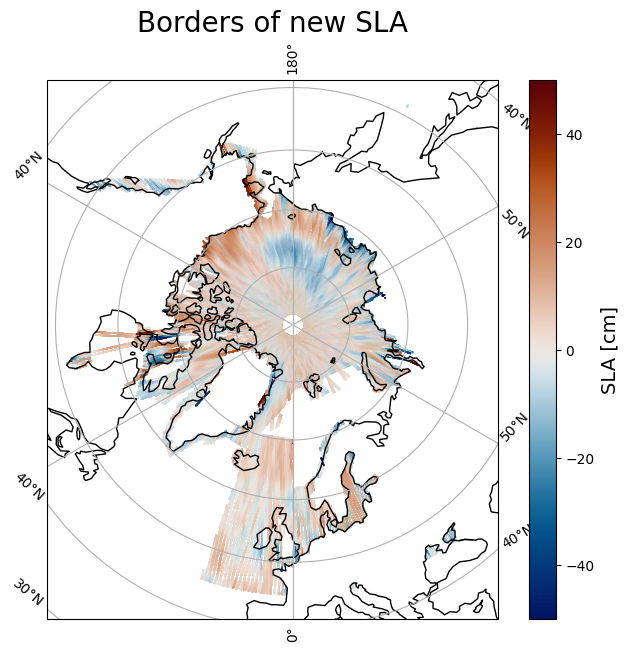

In [132]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(data_new.longitude, data_new.latitude, c=data_new[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.scatter(border_lon_new, border_lat_new, c="g", s=5, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Borders of new SLA", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [133]:
border_offset_median = np.nanmedian(border_sla_new)-np.nanmedian(border_sla_old)
border_offset_mean = np.nanmean(border_sla_new)-np.nanmedian(border_sla_old)
border_sla_new_corr = data_new[data_type] - border_offset_median
sla_both_border_corr = xr.concat([data_old[data_type], border_sla_new_corr], dim="time")

In [134]:
print(border_offset_median)
print(border_offset_mean)

nan
nan


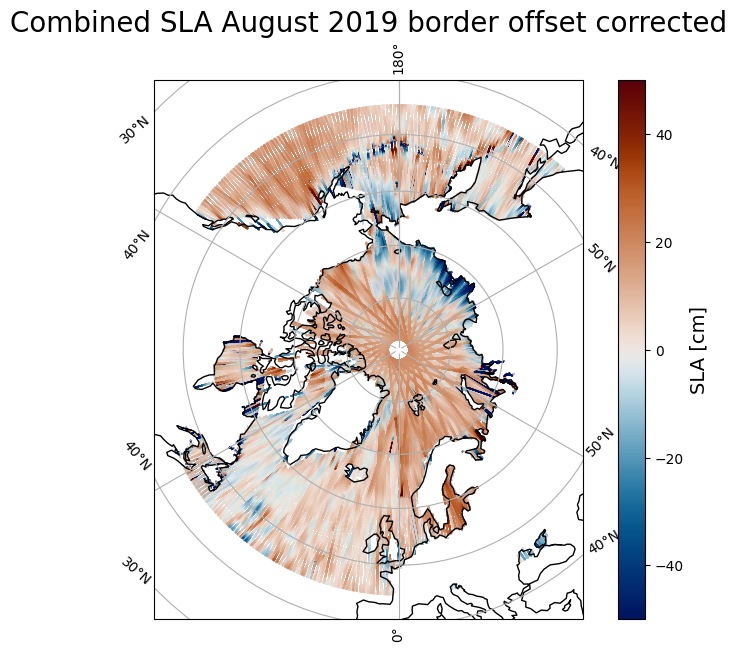

In [135]:
fig = plt.figure(figsize=(9,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both_border_corr*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 border offset corrected", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()